## <strong> 13. 시계열 전용 연산

필요한 라이브러리: ```yfinance```, ```pandas_datareader```

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# 구글 주식 데이터 로딩
goog = yf.download("GOOG", start="2004-01-01", end="2024-12-31")
goog.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2004-08-19,2.487352,2.579567,2.378775,2.478923,897427216
2004-08-20,2.684922,2.704009,2.491318,2.503960,458857488
2004-08-23,2.711942,2.813082,2.703266,2.745408,366857939
2004-08-24,2.599647,2.766478,2.567421,2.757554,306396159
2004-08-25,2.627659,2.677238,2.575105,2.601878,184645512


In [31]:
# [+] 종가(Close) 데이터만 사용하기
goog = yf.download('GOOG', start='2004-01-01',end='2024-12-31')
goog.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2004-08-19,2.487352,2.579567,2.378775,2.478923,897427216
2004-08-20,2.684922,2.704009,2.491318,2.503960,458857488
2004-08-23,2.711942,2.813082,2.703266,2.745408,366857939
2004-08-24,2.599647,2.766478,2.567421,2.757554,306396159
2004-08-25,2.627659,2.677238,2.575105,2.601878,184645512


In [32]:
goog=goog['Close']

<Axes: xlabel='Date'>

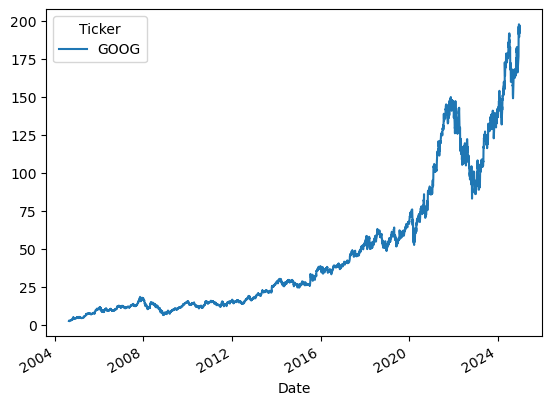

In [33]:
# [+] Lineplot 시각화
goog.plot()

#### <strong> 리샘플링(Resampling)
+ ```resample()```: 빈도를 기준으로 집계 연산
+ ```asfreq()```: 빈도 단위 별 데이터 선택

In [7]:
# [+] 다운샘플링: resample()
goog_downsampled = goog.resample('ME').mean()
goog_downsampled

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2004-08-31,2.609370,2.677209,2.554613,2.612757,2.983153e+08
2004-09-30,2.806814,2.848790,2.750542,2.775827,2.033387e+08
2004-10-31,3.798477,3.880542,3.702992,3.780122,4.914885e+08
2004-11-30,4.399970,4.510625,4.317411,4.416591,5.307326e+08
2004-12-31,4.505938,4.561196,4.450287,4.496688,2.652492e+08
...,...,...,...,...,...
2024-08-31,164.728801,166.740436,163.068952,164.765445,1.770996e+07
2024-09-30,158.933695,160.878014,157.745556,159.599577,1.945602e+07


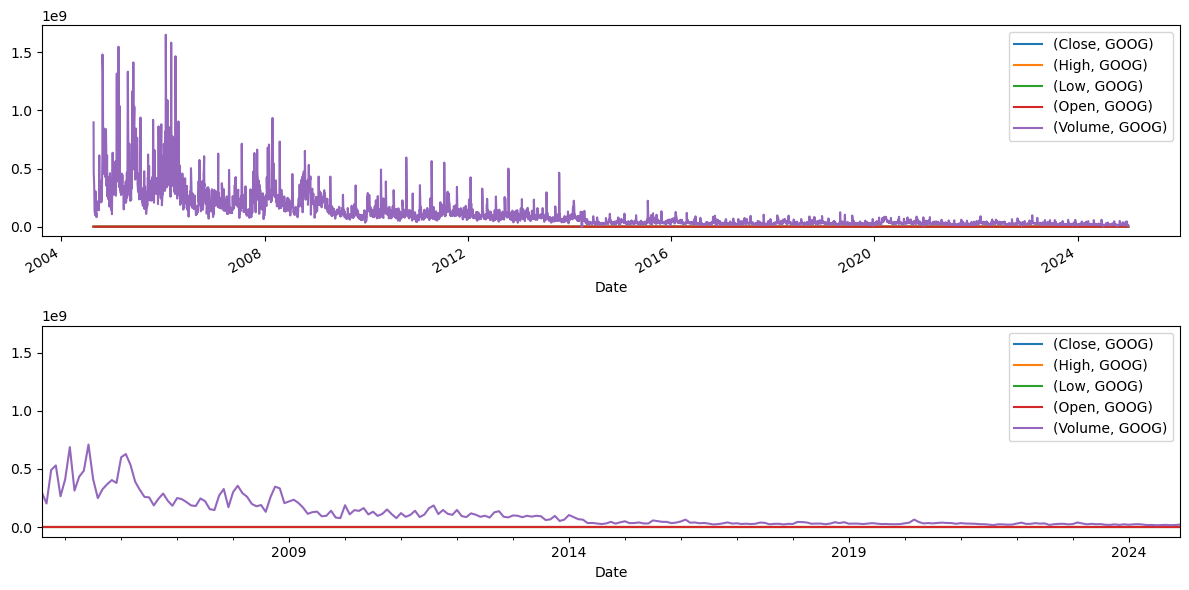

In [8]:
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(12, 6))
goog.plot(label='original', ax=ax[0])
ax[0].legend()
goog_downsampled.plot(label='downsampled', ax=ax[1])
ax[1].legend()
plt.tight_layout()

Axes(0.125,0.11;0.775x0.77)


[]

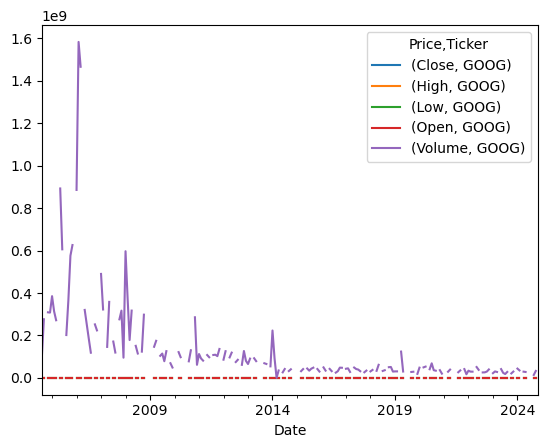

In [ ]:
# [+] 다운샘플링: asfreq()
goog_downsampled = goog.asfreq('ME').plot()
print(goog_downsampled)

goog_downsampled.plot()

In [12]:
# [+] 업샘플링: resample()
goog_upsampled = goog.resample('12h').mean()
print(goog_upsampled)

Price                     Close        High         Low        Open  \
Ticker                     GOOG        GOOG        GOOG        GOOG   
Date                                                                  
2004-08-19 00:00:00    2.487352    2.579567    2.378775    2.478923   
2004-08-19 12:00:00         NaN         NaN         NaN         NaN   
2004-08-20 00:00:00    2.684922    2.704009    2.491318    2.503960   
2004-08-20 12:00:00         NaN         NaN         NaN         NaN   
2004-08-21 00:00:00         NaN         NaN         NaN         NaN   
...                         ...         ...         ...         ...   
2024-12-28 00:00:00         NaN         NaN         NaN         NaN   
2024-12-28 12:00:00         NaN         NaN         NaN         NaN   
2024-12-29 00:00:00         NaN         NaN         NaN         NaN   
2024-12-29 12:00:00         NaN         NaN         NaN         NaN   
2024-12-30 00:00:00  192.470734  193.559490  190.143383  190.647813   

Price

#### <strong> 시프팅(Shifting)
+ ```shift(periods)``` : ```periods``` 값 만큼 시계열 이동

In [17]:
# [+] 900일 뒤로 시프팅 적용
goog_shifted = goog.shift(periods=900)
goog_shifted

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN
2004-08-20,NaN,NaN,NaN,NaN,NaN
2004-08-23,NaN,NaN,NaN,NaN,NaN
2004-08-24,NaN,NaN,NaN,NaN,NaN
2004-08-25,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2024-12-23,121.102898,121.571382,120.057100,120.073024,21856000.0
2024-12-24,119.559227,121.424887,119.533842,121.272608,38962000.0


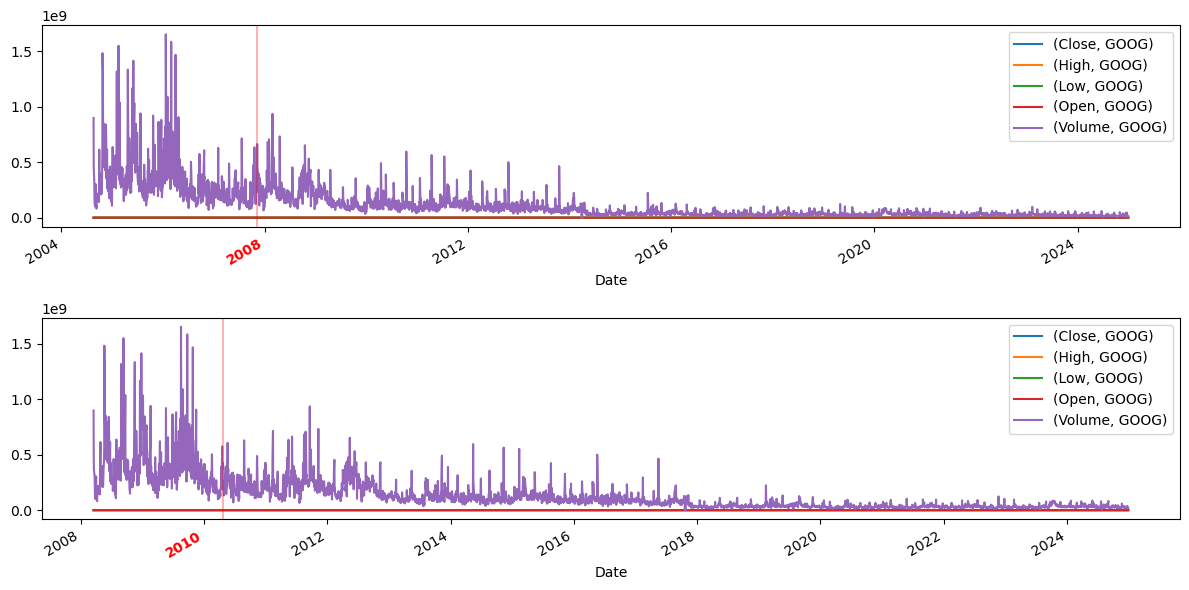

In [18]:
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(12, 6))

# Legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

goog.plot(label='original', ax=ax[0])
ax[0].legend()
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

goog_shifted.plot(label='shifted 900 days', ax=ax[1])
ax[1].legend()
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

plt.tight_layout()

In [19]:
# shifting 응용: 주가 변화율 계산
goog_shifted =goog.shift(periods=1)# [+] 시프팅
(goog - goog_shifted)# [+] 주가 변화율 계산

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2004-08-19,NaN,NaN,NaN,NaN,NaN
2004-08-20,0.197570,0.124443,0.112543,0.025037,-438569728.0
2004-08-23,0.027020,0.109073,0.211948,0.241447,-91999549.0
2004-08-24,-0.112295,-0.046604,-0.135846,0.012146,-60461780.0
2004-08-25,0.028012,-0.089240,0.007685,-0.155676,-121750647.0
...,...,...,...,...,...
2024-12-23,3.026550,2.352331,5.254024,7.012015,-30083800.0
2024-12-24,1.578217,1.178663,3.563945,2.137577,-8426100.0


Price          Close      High       Low      Open       Volume
Ticker          GOOG      GOOG      GOOG      GOOG         GOOG
Date                                                           
2004-08-19       NaN       NaN       NaN       NaN          NaN
2004-08-20  0.197570  0.124443  0.112543  0.025037 -438569728.0
2004-08-23  0.027020  0.109073  0.211948  0.241447  -91999549.0
2004-08-24 -0.112295 -0.046604 -0.135846  0.012146  -60461780.0
2004-08-25  0.028012 -0.089240  0.007685 -0.155676 -121750647.0
...              ...       ...       ...       ...          ...
2024-12-23  3.026550  2.352331  5.254024  7.012015  -30083800.0
2024-12-24  1.578217  1.178663  3.563945  2.137577   -8426100.0
2024-12-26 -0.469467  0.489447  0.671232  0.569358    1098100.0
2024-12-27 -3.056534 -1.358456 -3.893562 -0.269700    6785100.0
2024-12-30 -1.348450 -3.016563 -1.610160 -5.598613   -2483500.0

[5126 rows x 5 columns]


<Axes: xlabel='Date'>

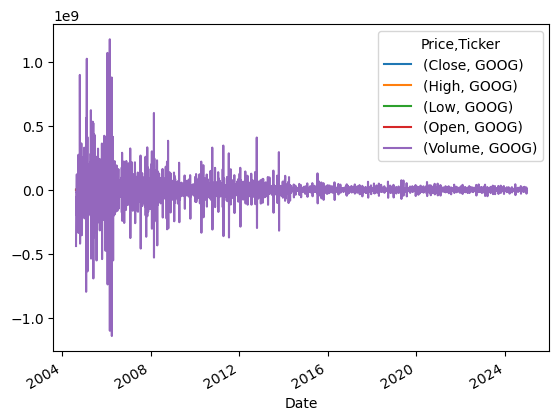

In [20]:
# shifting 응용: 차분 시계열 구하기
goog_diff = goog-goog_shifted # [+] 차분
print(goog_diff)

goog_diff.plot()

#### <strong> 윈도잉(Windowing)

Rolling [window=365,center=False,axis=0,method=single]


<Axes: xlabel='Date'>

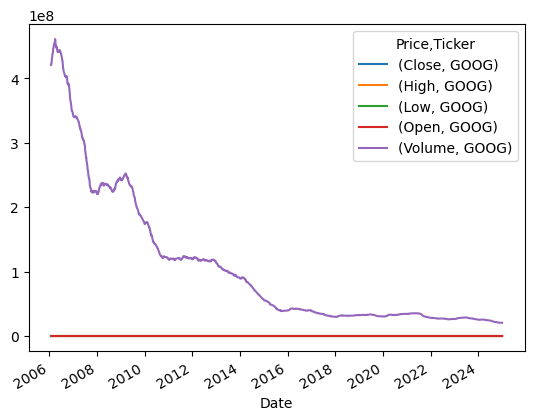

In [21]:
# [+] 365일 단위 윈도잉
goog_rolled = goog.rolling(365)
print(goog_rolled)

goog_rolled.mean().plot()

In [36]:
data = pd.DataFrame({'input': goog.values.flatten(),
                     # moving average
                     'one-year rolling_mean': goog_rolled.mean().values.flatten(), 
                     # standard deviation
                     'one-year rolling_std': goog_rolled.std().values.flatten()}, index=goog.index)
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

ValueError: Length of values (25630) does not match length of index (5126)